In [55]:
# Importing the required libraries
import pandas as pd
import numpy as np

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from nltk.classify import SklearnClassifier

SEED = 42

In [56]:
# Load the dataset
df = pd.read_csv('churn.csv')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [58]:
df = pd.read_csv("churn.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [59]:
df.CustomerId.nunique()

10000

In [60]:
# Check for NaN or NULL
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [61]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [62]:
df_drop = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


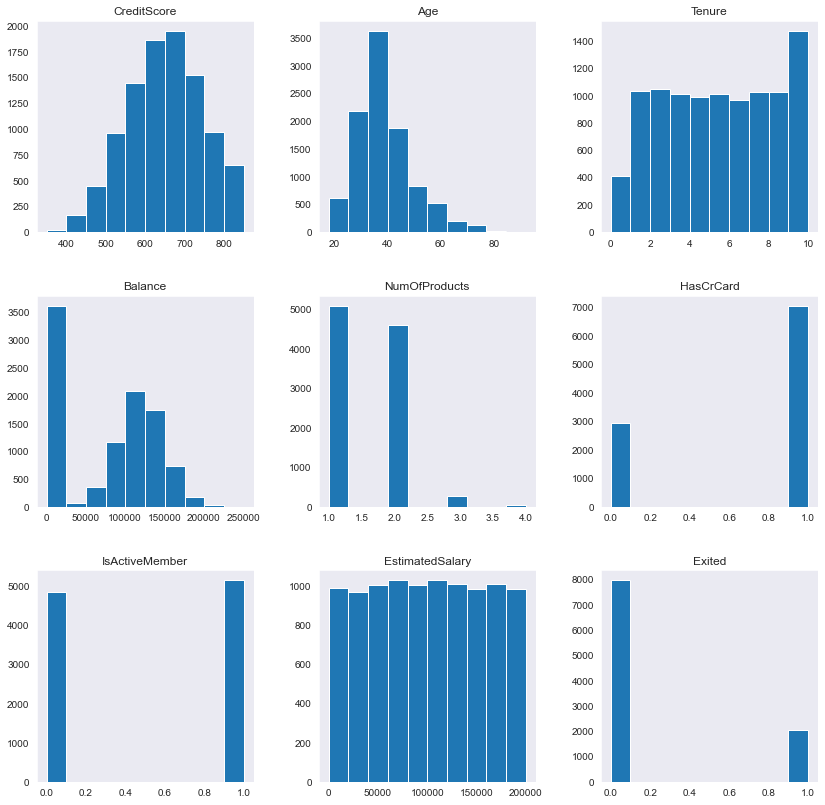

In [63]:
# Plot histogram grid
df.hist(figsize=(14,14),grid=False)

plt.show()

In [64]:
df_data_to_num = pd.get_dummies(df)
df_data_to_num

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


Text(0.5, 0, 'Number Of Products')

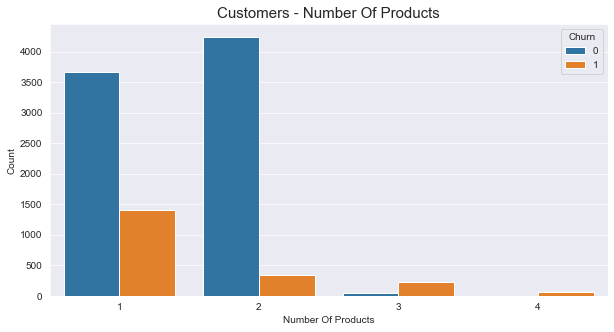

In [65]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x = "NumOfProducts", hue="Exited", data = df)
plt.legend(loc='upper right', title='Churn')
plt.title('Customers - Number Of Products', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Number Of Products')

Text(0.5, 0, 'Gender')

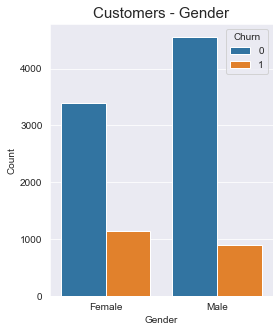

In [66]:
fig=plt.figure(figsize=(4,5))
sns.countplot(x = "Gender", hue="Exited", data = df)
plt.legend(loc='upper right', title='Churn')
plt.title('Customers - Gender', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Gender')

Text(0, 0.5, 'Count')

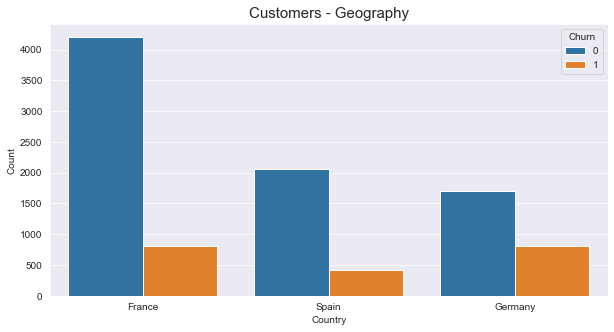

In [67]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x = "Geography", hue="Exited", data = df)
plt.legend(loc='upper right', title='Churn')
plt.title('Customers - Geography', fontsize=15)
plt.xlabel('Country')
plt.ylabel('Count')

Text(0.5, 0, 'Churn')

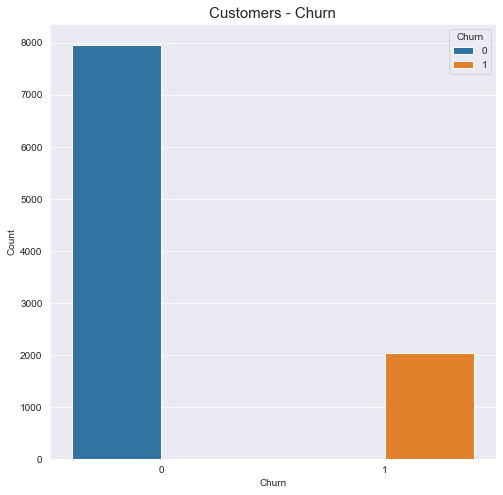

In [68]:
fig=plt.figure(figsize=( 8,8))
sns.countplot(x = "Exited", hue="Exited", data = df)
plt.legend(loc='upper right', title='Churn')
plt.title('Customers - Churn', fontsize=15)
plt.ylabel('Count')
plt.xlabel('Churn')

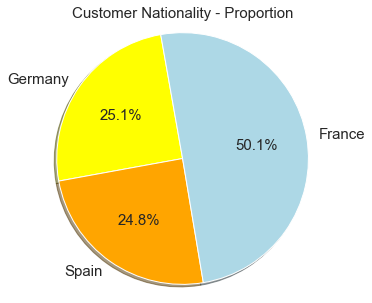

In [69]:
fig=plt.figure(figsize=(5,5))
#get total number of customers in each country
Customers_France = df_data_to_num.Geography_France.sum()
Customers_Germany = df_data_to_num.Geography_Germany.sum()
Customers_Spain = df_data_to_num.Geography_Spain.sum()

#list label
labels = ['Germany','Spain','France']
sizes = [Customers_Germany, Customers_Spain,Customers_France]
colors = ['yellow','orange', 'lightblue']
plt.title('Customer Nationality - Proportion', fontsize=15)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100,textprops={'fontsize': 15})
plt.axis('equal')
plt.show()

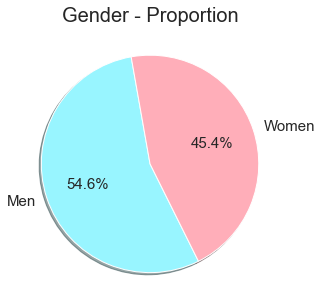

In [70]:
fig=plt.figure(figsize=(10,5))
# Data to plot
#df_data_to_num
#Men = df_data_to_num.loc[bankX['IsMale']==1, 'IsMale'].count()
#Women = df_data_to_num.loc[bankX['IsMale']==0, 'IsMale'].count()
male = df_data_to_num.Gender_Male.sum()
female = df_data_to_num.Gender_Female.sum()
sizes = [male,female]

labels = ['Men', 'Women']
colors = ['#98F5FF','#FFAEB9']
plt.title('Gender - Proportion', fontsize=20)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100,textprops={'fontsize': 15})
#plt.axis('equal')
plt.show()

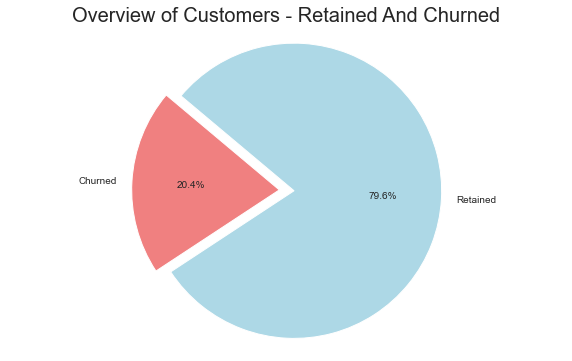

In [71]:
#plotting a pie chart

labels = 'Churned', 'Retained'
#exitCount = subset_df_exited.count()
#stayCount = subset_df_stayed.count()
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]

explode = (0, 0.1)
colors = ['lightcoral', 'lightblue', 'red']

fig1, ax1 = plt.subplots(figsize=(10, 6))
#ax1.pie([exitCount,stayCount], explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.pie(sizes, labels=labels, explode = explode , autopct='%1.1f%%', startangle=140, colors=colors)
ax1.axis('equal')
plt.title("Overview of Customers - Retained And Churned", size = 20)
plt.show()

<AxesSubplot:title={'center':'Age and Balance'}, xlabel='Balance', ylabel='CreditScore'>

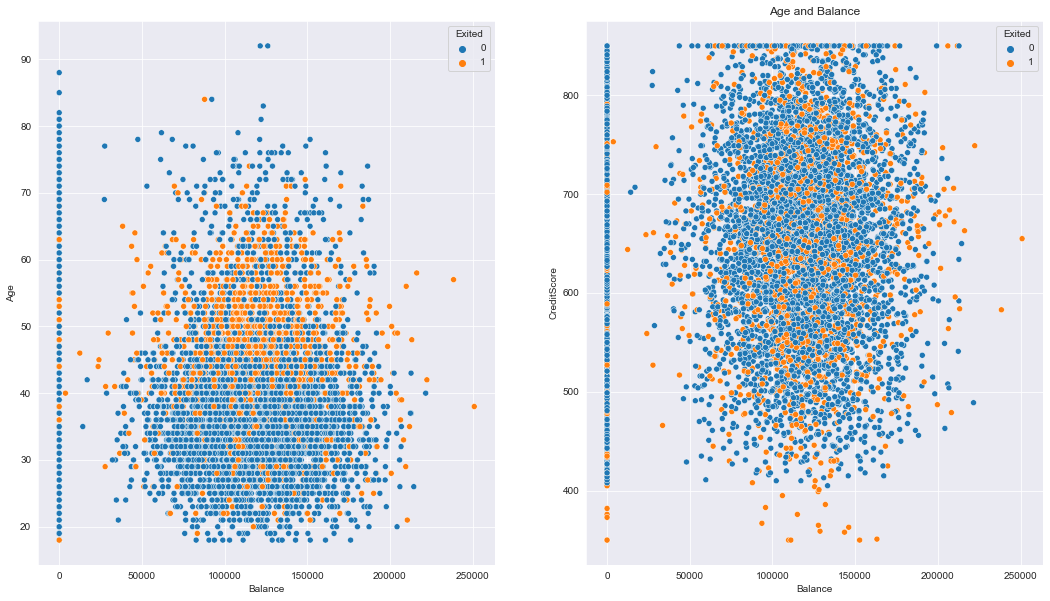

In [72]:
_, ax = plt.subplots(1, 2, figsize=(18, 10))
plt.title("Age and Balance")
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])



<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

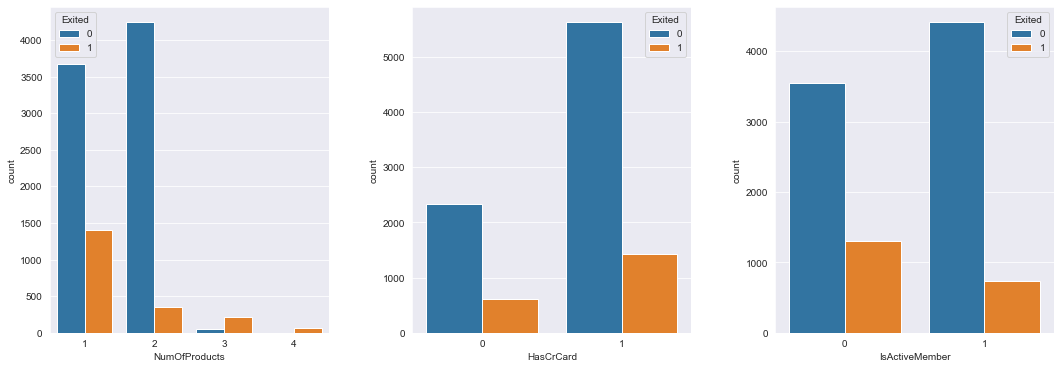

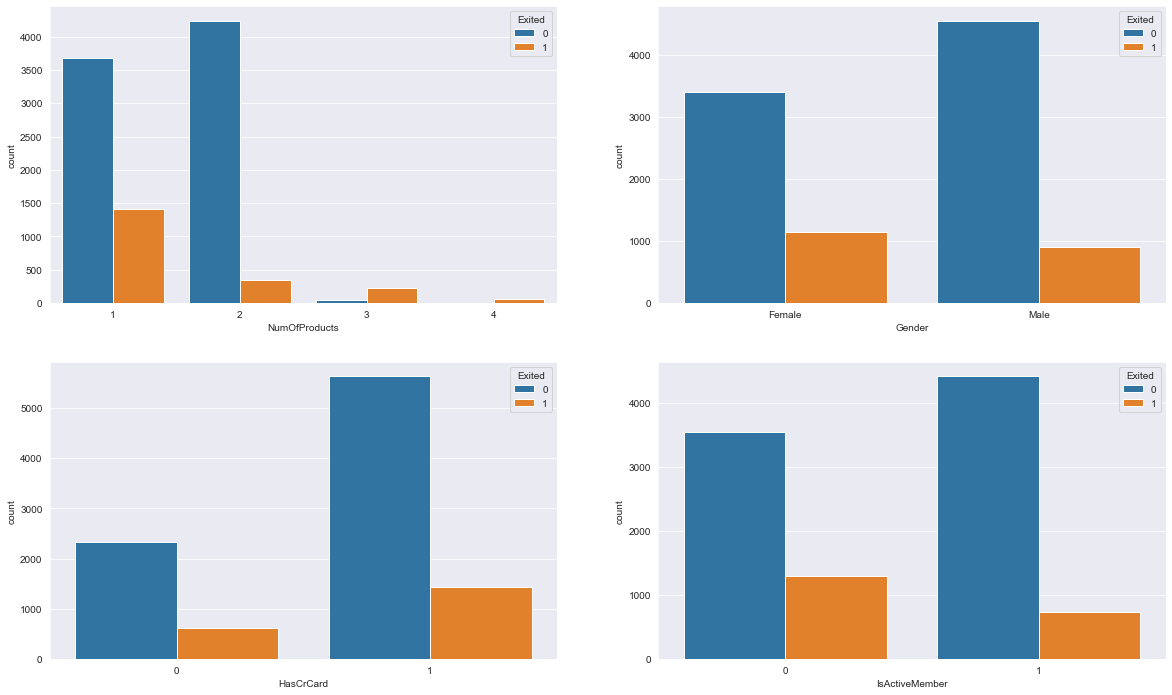

In [73]:
# plotting counter plots

_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue ="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x="NumOfProducts", hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

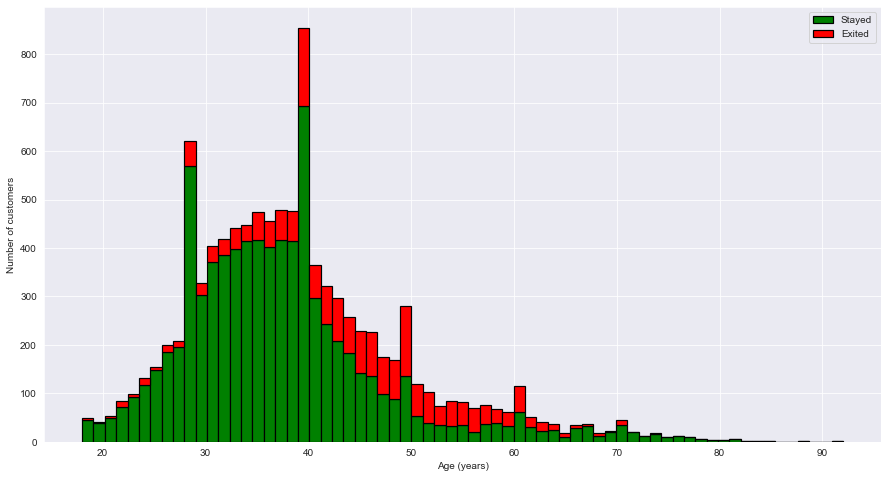

In [74]:
#Stacked histogram: Age
figure = plt.figure(figsize=(15,8))
plt.hist([
        df[(df.Exited==0)]['Age'],
        df[(df.Exited==1)]['Age']
        ], 
         stacked=True, color = ['green','r'],
         bins = 'auto',label = ['Stayed','Exited'],
         edgecolor='black', linewidth=1.2)
plt.xlabel('Age (years)')
plt.ylabel('Number of customers')
plt.legend()

In [75]:
# Calculate correlations between numeric features
correlations = df.corr()

#sort features in order of their correlation with "Exited"
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
sort_corr

,Exited,Age,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,IsActiveMember
Exited,1.000000,0.285323,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.156128
Age,0.285323,1.000000,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,0.085472
Balance,0.118533,0.028308,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.010084
EstimatedSalary,0.012097,-0.007201,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.011421
HasCrCard,-0.007138,-0.011721,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.011866
Tenure,-0.014001,-0.009997,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,-0.028362
CreditScore,-0.027094,-0.003965,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.025651
NumOfProducts,-0.047820,-0.030680,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009612
IsActiveMember,-0.156128,0.085472,-0.010084,-0.011421,-0.011866,-0.028362,0.025651,0.009612,1.000000


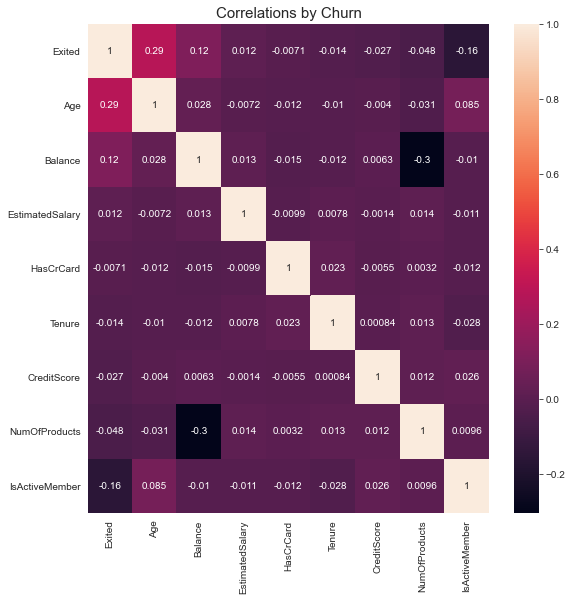

In [76]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
##with sns.axes_style('white'):
sns.heatmap(sort_corr, annot=True) # annot=annotation
    
plt.title('Correlations by Churn', fontsize=15)
plt.yticks(rotation=0)
plt.show()

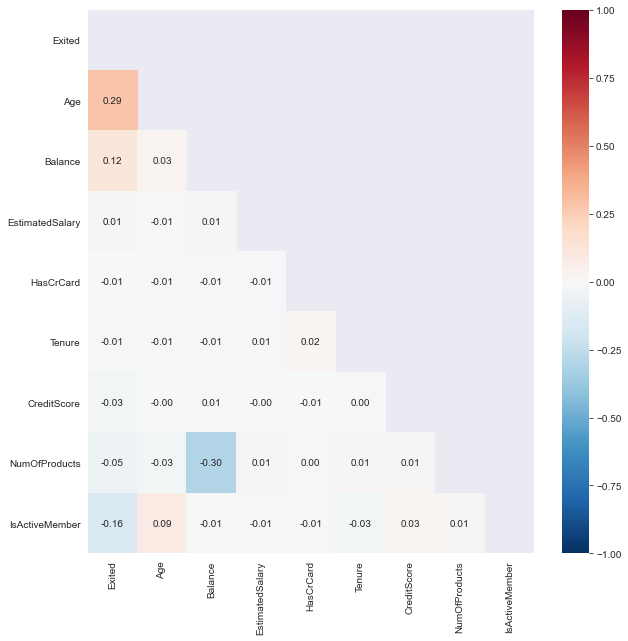

In [77]:

fig=plt.figure(figsize=(10,10))
mask = np.zeros_like(sort_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat=sns.heatmap(sort_corr,mask=mask,annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='RdBu_r')
fig.add_subplot(heat)
plt.show()

In [78]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [79]:
df['Gender'] = [0 if x == 'Male' else 1 for x in df['Gender']]

# Create dummy variables
dummy_country = pd.get_dummies(df['Geography'], prefix='Country', drop_first=True)

to_drop = ['Gender','Geography']
df.drop(to_drop, axis=1, inplace=True)

merged = pd.concat([df, dummy_country], axis=1)
merged.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_Germany,Country_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [80]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in df.columns if df[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(merged[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    merged[col] = scaled[col]
    
merged.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_Germany,Country_Spain
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [81]:
from sklearn.model_selection import train_test_split

X = merged.drop('Exited', axis=1)
y = merged['Exited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 20.55
% Positive class in Test  = 19.65


Accuracy = 0.87
Recall = 0.49



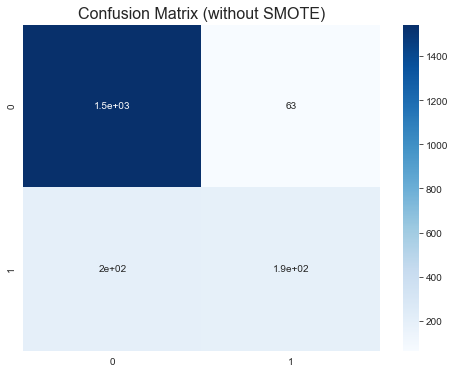

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=SEED)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [83]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (10000, 10)
Shape of X after SMOTE: (15926, 10)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Exited, dtype: float64

Accuracy = 0.89
Recall = 0.89



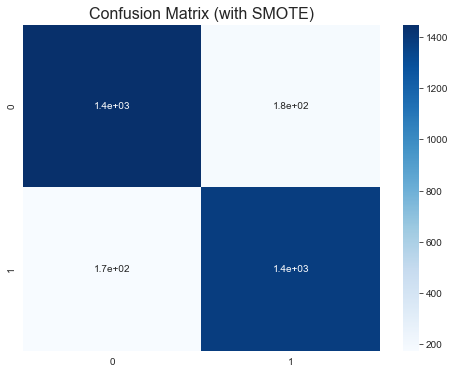

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=SEED
)

model = RandomForestClassifier(random_state=SEED)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

In [87]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1,random_state=SEED)

In [88]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-2, 2, 5)}

gs_logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_logreg.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.71263033        nan 0.71325861        nan 0.71318107
        nan 0.71325861        nan 0.71318007        nan 0.71325861
        nan 0.71325861        nan 0.71325861        nan 0.71325861
        nan 0.71325861]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [89]:
# Best model hyperparameters and score
print(gs_logreg.best_estimator_)
print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

LogisticRegression(C=0.01, n_jobs=-1, penalty='none', random_state=42)
{'C': 0.01, 'penalty': 'none'}
0.7132586070887382


In [90]:
# Using best estimator found by GridSearchCV
logreg = gs_logreg.best_estimator_
logreg.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, n_jobs=-1, penalty='none', random_state=42)

In [91]:
y_pred = logreg.predict(X_test_scaled)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1633
           1       0.71      0.70      0.70      1553

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



In [93]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [94]:
# Multi-Level Perceptron
mlp = MLPClassifier(solver='sgd',random_state=SEED)

In [95]:
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'hidden_layer_sizes': [(3,3),
                                     (2),
                                     (3)], 
              'alpha': np.logspace(-4, -1, 4),
              'max_iter': [400, 450, 500, 550]}

gs_mlp = GridSearchCV(mlp,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_mlp.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42, solver='sgd'),
             n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'hidden_layer_sizes': [(3, 3), 2, 3],
                         'max_iter': [400, 450, 500, 550]},
             scoring='f1_macro')

In [96]:
print(gs_mlp.best_estimator_)
print(gs_mlp.best_params_)
print(gs_mlp.best_score_)

MLPClassifier(alpha=0.01, hidden_layer_sizes=3, max_iter=400, random_state=42,
              solver='sgd')
{'alpha': 0.01, 'hidden_layer_sizes': 3, 'max_iter': 400}
0.7649504438393006


In [97]:
mlp = gs_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=3, max_iter=400, random_state=42,
              solver='sgd')

In [98]:
y_pred = mlp.predict(X_test_scaled)

In [99]:
predictions = mlp.predict(X_test_scaled) # Using the test set to predict

In [100]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1633
           1       0.74      0.78      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



In [101]:
models.append('MLPClassifier')
precision_list.append(precision_score(y_test, predictions, average='macro'))
recall_list.append(recall_score(y_test, predictions, average='macro'))
f1_score_list.append(f1_score(y_test, predictions, average='macro'))
training_acc_list.append(accuracy_score(y_train, mlp.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, predictions))

In [102]:
dt = DecisionTreeClassifier(random_state=SEED)

In [103]:
# Hyperparameter fine-tuning for Decision Tree on multi-class dataset
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 3, 5]}

gs_clf = GridSearchCV(dt,
                      parameters, 
                      cv=5,
                      # scoring='f1_macro',
                      scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_clf.fit(X_train, y_train)


In [104]:
print(gs_clf.best_estimator_)
print(gs_clf.best_params_)
print(gs_clf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
0.8922390592306157


In [105]:
# Using best estimator found by GridSearchCV
dt = gs_clf.best_estimator_
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       random_state=42)

In [106]:
y_pred = dt.predict(X_test_scaled) # Using the test set to predict

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1633
           1       0.81      0.81      0.81      1553

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



In [108]:
models.append('Decision Tree')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, dt.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [109]:
rf = RandomForestClassifier(n_jobs=-1,random_state=SEED)

In [110]:
# Hyperparameter fine-tuning for Random Forest on multi-class dataset
parameters = {'n_estimators': [50, 100, 150, 250],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 3, 5]}

In [111]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                      parameters, 
                      cv=5,
                      scoring='roc_auc_ovr',
                      n_jobs=-1)
_ = gs_rf.fit(X_train_scaled, y_train)

In [112]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print("best score: " ,gs_rf.best_score_)

RandomForestClassifier(max_depth=20, n_estimators=250)
{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 250}
best score:  0.9525006592680768


In [113]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=250)

In [114]:
y_pred = rf.predict(X_test_scaled)

In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1633
           1       0.88      0.89      0.88      1553

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186



In [116]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))


In [117]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [118]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
3,Random Forest,0.999451,0.887006,0.886904,0.887045,0.886957
2,Decision Tree,0.856436,0.814187,0.814112,0.813975,0.814032
1,MLPClassifier,0.766562,0.760515,0.760917,0.760955,0.760514
0,Logistic Regression,0.713265,0.710295,0.710118,0.709962,0.710015


88.70056497175142 % overall ACCURACY of trained model on the dataset




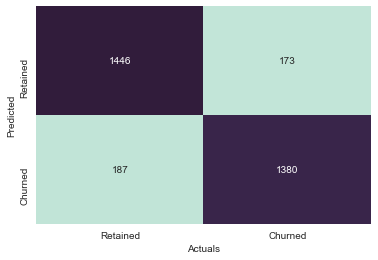

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['Retained','Churned'],
          yticklabels=['Retained','Churned'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')
print(((cm[0][0]+cm[1][1])*100)/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]), '% overall ACCURACY of trained model on the dataset')
print("\n")

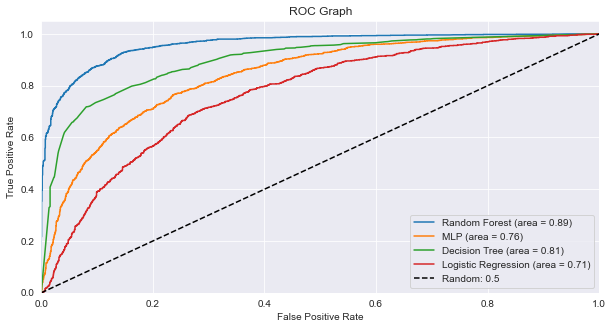

In [120]:
mlp_fpr, mlp_tpr, mlp_thresholds = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test_scaled)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:,1])

log_reg_auc_score = roc_auc_score(y_test,logreg.predict(X_test_scaled))
mlp_auc_score = roc_auc_score(y_test,mlp.predict(X_test_scaled))
dt_auc_score = roc_auc_score(y_test,dt.predict(X_test_scaled))
rf_auc_score = roc_auc_score(y_test,rf.predict(X_test_scaled))





plt.figure(figsize=(10,5
                   ))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc_score)

# Plot MLP ROC
plt.plot(mlp_fpr, mlp_tpr, label='MLP (area = %0.2f)' % mlp_auc_score)

# Plot DT ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_auc_score)

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc_score)


# Plot Base Rate ROC
plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()



In [121]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

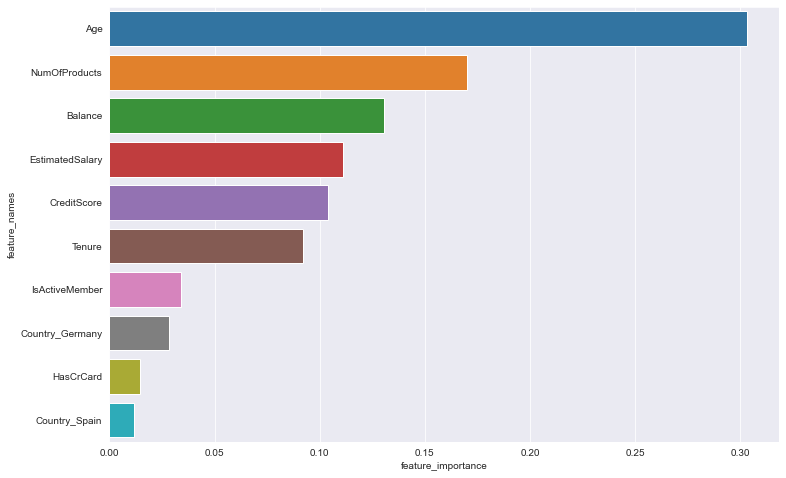

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])